In [ ]:
## first let me import some libraries

In [ ]:
!pip install tensorflow
!pip install matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test  = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
       0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215687, 0.53333336, 0.85882354, 0.84705883, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.8509804 , 0.84313726, 0.99607843, 0.90588236, 0.627451  ,
       0.1764706 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.6901961 , 0.87058824, 0.8784314 ,
       0.83137256, 0.79607844, 0.7764706 , 0.76862746, 0.78431374,
       0.84313726, 0.8       , 0.7921569 , 0.7882353 , 0.78823

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_names)

10

In [ ]:
base_model_1 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="Baseline")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
base_model_1

<Sequential name=Baseline, built=True>

In [ ]:
base_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_model_1_trained = base_model_1.fit(x_train, y_train, epochs=30, batch_size=128,validation_split=0.2, verbose=2)

Epoch 1/30
375/375 - 4s - 11ms/step - accuracy: 0.8213 - loss: 0.5002 - val_accuracy: 0.8583 - val_loss: 0.3922
Epoch 2/30
375/375 - 2s - 4ms/step - accuracy: 0.8659 - loss: 0.3675 - val_accuracy: 0.8672 - val_loss: 0.3671
Epoch 3/30
375/375 - 1s - 3ms/step - accuracy: 0.8814 - loss: 0.3206 - val_accuracy: 0.8787 - val_loss: 0.3338
Epoch 4/30
375/375 - 1s - 3ms/step - accuracy: 0.8885 - loss: 0.3001 - val_accuracy: 0.8767 - val_loss: 0.3370
Epoch 5/30
375/375 - 1s - 3ms/step - accuracy: 0.8948 - loss: 0.2810 - val_accuracy: 0.8878 - val_loss: 0.3102
Epoch 6/30
375/375 - 1s - 3ms/step - accuracy: 0.9013 - loss: 0.2621 - val_accuracy: 0.8873 - val_loss: 0.3142
Epoch 7/30
375/375 - 1s - 3ms/step - accuracy: 0.9071 - loss: 0.2469 - val_accuracy: 0.8880 - val_loss: 0.3153
Epoch 8/30
375/375 - 1s - 3ms/step - accuracy: 0.9106 - loss: 0.2390 - val_accuracy: 0.8829 - val_loss: 0.3320
Epoch 9/30
375/375 - 1s - 3ms/step - accuracy: 0.9135 - loss: 0.2275 - val_accuracy: 0.8813 - val_loss: 0.3394


In [ ]:
# Plot the accuracy
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

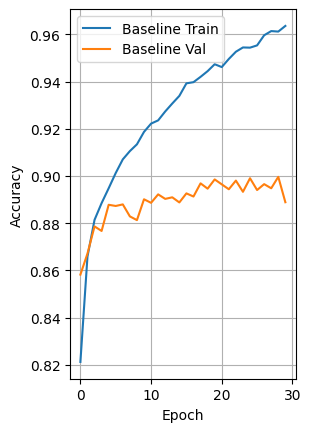

In [ ]:
plt.subplot(1,2,1)
plt.plot(base_model_1_trained.history['accuracy'], label='Baseline Train')
plt.plot(base_model_1_trained.history['val_accuracy'], label='Baseline Val')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

In [ ]:
improved_base_model_1 = models.Sequential([
    layers.Dense(512, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
], name="With_Dropout_BatchNorm")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
improved_base_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
improved_base_model_1_trained = improved_base_model_1.fit(x_train, y_train, epochs=30, batch_size=128,validation_split=0.2, verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7702 - loss: 0.6562 - val_accuracy: 0.8373 - val_loss: 0.4356
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3902 - val_accuracy: 0.8639 - val_loss: 0.3698
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8744 - loss: 0.3407 - val_accuracy: 0.8718 - val_loss: 0.3526
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8796 - loss: 0.3227 - val_accuracy: 0.8589 - val_loss: 0.3901
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8839 - loss: 0.3074 - val_accuracy: 0.8774 - val_loss: 0.3497
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.2838 - val_accuracy: 0.8716 - val_loss: 0.3514
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.2725 - val_accuracy: 0.8886 - val_loss: 0.3049
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9004 - loss: 0.2596 - val_accuracy: 0.

In [ ]:

# Plot the accuracy
plt.figure(figsize=(150,50))

<Figure size 15000x5000 with 0 Axes>

<Figure size 15000x5000 with 0 Axes>

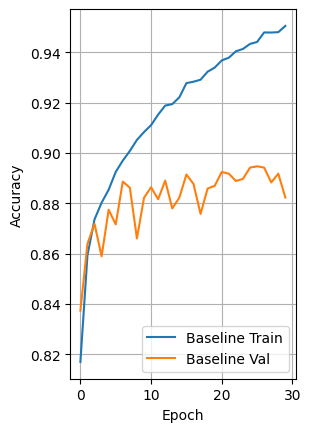

In [ ]:
plt.subplot(1,2,1)
plt.plot(improved_base_model_1_trained.history['accuracy'], label='Baseline Train')
plt.plot(improved_base_model_1_trained.history['val_accuracy'], label='Baseline Val')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

In [ ]:
base_model_2 = models.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(784,)),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(10, activation='softmax')
], name="Monster_Overfitter")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## here i have increase the parameter !!

In [ ]:
base_model_2

<Sequential name=Monster_Overfitter, built=True>

In [ ]:
base_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Trained_base_model_2 = base_model_2.fit(x_train, y_train, epochs=60, batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7420 - loss: 0.7107 - val_accuracy: 0.8595 - val_loss: 0.3946
Epoch 2/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8626 - loss: 0.3819 - val_accuracy: 0.8578 - val_loss: 0.3933
Epoch 3/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8700 - loss: 0.3489 - val_accuracy: 0.8625 - val_loss: 0.3810
Epoch 4/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8820 - loss: 0.3197 - val_accuracy: 0.8737 - val_loss: 0.3606
Epoch 5/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8904 - loss: 0.2965 - val_accuracy: 0.8742 - val_loss: 0.3638
Epoch 6/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8944 - loss: 0.2821 - val_accuracy: 0.8836 - val_loss: 0.3266
Epoch 7/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9025 - loss: 0.2615 - val_accuracy: 0.8840 - val_loss: 0.3325
Epoch 8/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9050 - loss: 0.2546 - val_accuracy: 0.

In [ ]:
plt.figure(figsize=(30,10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

In [ ]:
base_model_2.summary()

Model: "Monster_Overfitter"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,217,226 (54.23 MB)

 Trainable params: 14,217,226 (54.23 MB)

 Non-trainable params: 0 (0.00 B)

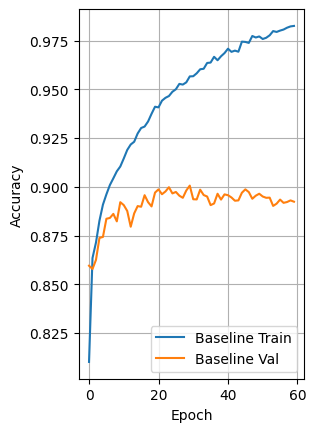

In [ ]:
plt.subplot(1,2,1)
plt.plot(Trained_base_model_2.history['accuracy'], label='Baseline Train')
plt.plot(Trained_base_model_2.history['val_accuracy'], label='Baseline Val')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

In [ ]:
## lets improve the model .

In [ ]:
improved_base_model_2 = models.Sequential([
    layers.Dense(2048, input_shape=(784,)),   # ← This is REQUIRED
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    layers.Dense(2048),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    layers.Dense(2048),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    layers.Dense(2048),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
], name="improved_base_model")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
improved_base_model_2

<Sequential name=improved_base_model, built=True>

In [ ]:
improved_base_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
improved_base_model_2_trained = improved_base_model_2.fit(x_train, y_train, epochs=100, batch_size=128,validation_split=0.4,verbose=1, callbacks=[early_stopping])

Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9745 - loss: 0.0674 - val_accuracy: 0.9216 - val_loss: 0.3449
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9724 - loss: 0.0740 - val_accuracy: 0.9235 - val_loss: 0.3371
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9740 - loss: 0.0704 - val_accuracy: 0.9210 - val_loss: 0.3502
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9728 - loss: 0.0720 - val_accuracy: 0.9188 - val_loss: 0.3423
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9769 - loss: 0.0612 - val_accuracy: 0.9221 - val_loss: 0.3267
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9720 - loss: 0.0764 - val_accuracy: 0.9230 - val_loss: 0.3200
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9751 - loss: 0.0664 - val_accuracy: 0.9190 - val_loss: 0.3462
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9756 - loss: 0.0641 - val_

In [ ]:
plt.figure(figsize=(300,133))

<Figure size 30000x13300 with 0 Axes>

<Figure size 30000x13300 with 0 Axes>

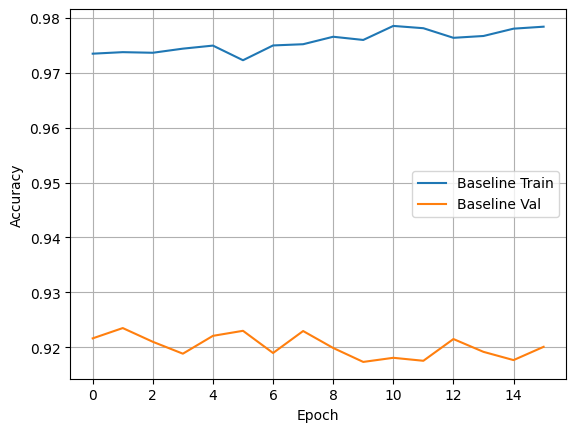

In [ ]:
plt.subplot(1,1,1)
plt.plot(improved_base_model_2_trained .history['accuracy'], label='Baseline Train')
plt.plot(improved_base_model_2_trained .history['val_accuracy'], label='Baseline Val')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

| Metric | Normal / Healthy | Warning (Possible Overfitting) | Severe Overfitting (Act Now!) |
|---|---|---|---|
| Train Accuracy | 92–96% | 97–99% | ≥ 99.5% |
| Validation Accuracy | Within ~3–5% of train | 6–10% below train | ≥ 10–15% below train |
| Train Loss | Low and still decreasing | Very low | Almost 0 |
| Validation Loss | Close to train loss | Starts rising while train loss falls | Clearly rising (classic U-shape) |
| Gap (Train Acc – Val Acc) | ≤ 4–5% → good | 6–10% → mild overfitting | ≥ 10% → severe overfitting |

In [ ]:
### lets do it for regression problem !!!!

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# MODEL 1: The Memorizing Monster (overfits badly)
regression_base_model = models.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1)   # regression → single output, no activation
], name="regression_base_model")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
